# Notebook 1_5

## Time Constant, Intro to Laplace Transform

#### Student Learning Outcomes
* Learn the concept of Transient State and Steady State.
* Learn the concept of Time Constant.
* Start to learn the concept of the Laplace Transform.

--------------------

In [2]:
# import at first
import numpy as np
import matplotlib.pyplot as plt


<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Transition Time to Steady State</h2>
</div>

Review the last part of Notebook 1_4:

For such system:
* system model is first order: $C\frac{dT(t)}{dt}+GT(t)=\dot Q(t)$
* system input is step signal: $\dot Q(t) = A u(t)$

The system output is solved as: $\dot T(t) = \frac{A}{G}-\frac{A}{G}e^{-\frac{G}{C}t}$

We tested with 
* fixed system model parameters: $C = 10000$, $G = 200$
* 2 different input: $A = 6000$ (6 kW heater input), and $ A = 4000 $ (4 kW heater input)

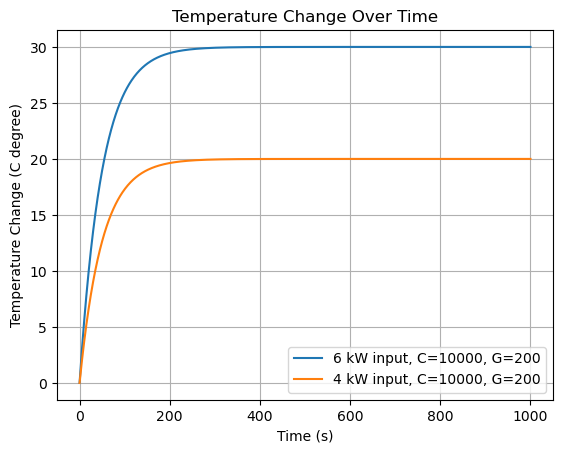

In [3]:
# Run this code to reproduce Notebook 1_4 final result
C = 10000
G = 200
t = np.linspace(0, 1000, 1000)

T_t = 6000/G + (-6000/G)*np.exp(-G/C*t)
T_t2 = 4000/G + (-4000/G)*np.exp(-G/C*t)


plt.plot(t, T_t, color="tab:blue",label="6 kW input, C=10000, G=200")
plt.plot(t, T_t2, color="tab:orange", label="4 kW input, C=10000, G=200")
plt.title("Temperature Change Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Change (C degree)")
plt.grid(True)
plt.legend()


From this graph, you can observer: Both curves flatten at the same time.

Formally, we have two terms:

* **Transient State:** The part of the output signal where the it is still significantly changing over time.
* **Steady State:** The part of the output signal where it is stabilized and no longer changes significantly.

In other words, **For first-order systems with a step input, different step inputs do not affect the duration of the transient state** (the time it takes to transition from the initial state to steady state). The transition time is determined only by the system model's parameters.

On the this plot, we can eyeball the **Transition Time to Steady State** is about 250 seconds.

-----------

Now, let's explore more. Suppose we fix the step input as $6000$ unchanged, but adjust some system model parameters:
* Change $C$ from 10000 to 5000. $G$ the same
* $C$ the same. Change $G$ from 200 to 80

We can plot more in using the code below.

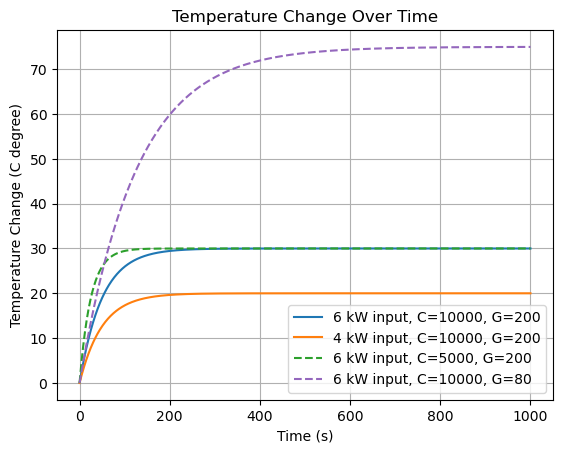

In [4]:
# Run this code
# No need to change the scipt
C_new = 5000
G_new = 80
T_t3 = 6000/G + (-6000/G)*np.exp(-G/C_new*t)
T_t4 = 6000/G_new + (-6000/G_new)*np.exp(-G_new/C*t)

plt.plot(t, T_t, color="tab:blue",label="6 kW input, C=10000, G=200")
plt.plot(t, T_t2, color="tab:orange", label="4 kW input, C=10000, G=200")
plt.plot(t, T_t3, color="tab:green",label="6 kW input, C=5000, G=200", linestyle='--')
plt.plot(t, T_t4, color="tab:purple",label="6 kW input, C=10000, G=80", linestyle='--')

plt.title("Temperature Change Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Change (C degree)")
plt.grid(True)
plt.legend()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Run Code to get graph: 1 pt</strong>
</span>

Create a Markdown cell below. Indicate your observation on the 2 new curves (dashed). State in such format:
> Once I change a system model parameter C from ?? to ??, the Transition Time to Steady State is about ?? seconds. The Transition time is (the same/longer/shorter) than before.

* Once I change a system model parameter C from 10000 to 5000, the Transition Time to Steady State is about 170 seconds. The Transition time is shorter than before.
* Once I change a system model parameter G from 200 to 80, the Transition Time to Steady State is about 800 seconds. The Transition time is longer than before.

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Draw conclusion from the graph: 2 pts</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: Time Constant</h2>
</div>

From the Task 1, we can estimate the Transition Time to Steady State by eye-balling the plot.

In engineering, subjective estimation is not enough. We still need a **strict, quantitative criterion (metric)** for Transition Time to Steady State. 

To do so, let's move on to a more general setting and study the math:

For any first order system with step input:
* $\frac{dy(t)}{dt}+ay(t)=bx(t)$
* $x(t) = Au(t)$
* $x(t)$ in the input, $y(t)$ is the output
  
> Copy and Paste these 3 lines into ChatGPT,
```markdown
* System model: $\frac{dy(t)}{dt}+ay(t)=bx(t)$
* System input: $x(t) = Au(t)$
how to solve for System output $T(t)$ using separation of variables approach (not Laplace approach). Set zero initial condition"
```

Create a Markdown cell below, only type the final answer for $y(t)$ given by ChatGPT.


$$ y(t) = \frac{bA}{a}(1-e^{-at}) $$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Result of output: 1 pt</strong>
</span>

If you look at the result, there is only one term that changes over time: 

$$e^{-at}$$

So this is the only term that determines the Transition Time to Steady State for a first order system with step input.
    
And if we evaluate $y(t)$ at $t=1/a$ and $t=\infty$, we get 

$$\frac{y(t=1/a)}{y(t=\infty)} = 1-e^{-1} \approx 0.632$$

-----------

Formally, the time $1/a$ is named as **Time Constant**, typically denoted as $\tau$ (unit: second),

**Time Constant** is the time at which the first-order system's output reaches $1-e^{-1}$ of its steady state value when subjected to a step input.

And Time Constant $\tau$ is only related with model parameter $b$, has nothing to do with step input.

--------------------

Now, it is your work to evaluate $y(t)$ at $t=5\tau = 5/a$ and $t=\infty$: 

$$\frac{y(t=5\tau)}{y(t=\infty)} =  0.993$$


In [5]:
1-np.exp(-5)

0.9932620530009145

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Result: 1 pt</strong>
</span>

You should get a value close to 1.

Yes, engineers generally use 5 time constants ($5\tau$) to represent the Transition Time to Steady State.

This is how we have a **strict, quantitative criterion (metric) for Transition Time to Steady State for first order systems with step input**.

------
<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: Intro to Laplace Transform</h2>
</div>


In these 3 notebooks, we used ChatGPT to solve the first order diff equations. 

If you look at the solving steps, they are tedious and involve integration operations. And this is just for the simplest case in system analysis:
* First order system
* Input is only impulse or step                                                                                                                                        
                                                                                                                                               
Imagine you deal with more complicated situation:
* Higher order system (include $\frac{d^2y(t)}{dt^2}$, $\frac{d^3y(t)}{dt^3}$, ...)
* More complex input

The solving process becomes more tedious, also requiring more integration and differentiation steps

-------------

In engineering, multiple methods have been proposed over time to simplify the solving process for differential equations. 

By the 1940s, people reached a common agreement that the **Laplace Transform** is the most effective tool for solving many linear differential equations in the engineering field.

All you need are
* **A Laplace Transform table**
* **Ability to do Algebra**
* **No need for ability to do calculus (integral or derivative)**

----------

Before jumpling into deep theory, let's first see how to use it to solve the diff equation with numbers in the beginning of this notebook.

* system model is first order: $10000\frac{dT(t)}{dt}+200T(t)=\dot Q(t)$
* system input is step signal: $\dot Q(t) = 6000 u(t)$

### **Step 1: Transform to the Laplace domain**

By looking-up the Laplace Transform table,

The Laplace Transform (denoted as symbol $\mathcal{L}(...)$) for each term can be obtained:
* time-dependent variable $T(t)$ can be directly written as $T(s)$.
* $\mathcal{L}(10000\frac{dT(t)}{dt})=10000 (sT(s)-T(0))$
<br>Since the initial condition is 0 (no temp diffence between outside/inside), we plug in $T(0)=0$.
* $\mathcal{L}(200T(t)) = 200T(s)$
* $\mathcal{L}(6000u(t)) = \frac{6000}{s}$

Here, $s$ is a new variable in the Laplace domain.

### **Step 2: Solve for Output in the Laplace domain**

After Laplace transform, the previous diff equation is written as:

$$10000\cdot sT(s)+200T(s) = \frac{6000}{s}$$
$$(10000s+200)T(s) =\frac{6000}{s} $$
$$(10000s+200)T(s) =\frac{6000}{s} $$
$$T(s) = \frac{6000}{10000 s (s + 0.02)}= \frac{0.6}{s (s + 0.02)}=\frac{30}{s} + \frac{-30}{s + 0.02}$$


### **Step 3: Inverse Laplace Transform to the time domain**


Again looking-up the Laplace Transform table,
* $\mathcal{L}^{-1}(\frac{30}{s}) = 30u(t)$
* $\mathcal{L}^{-1}( \frac{-30}{s + 0.02}) = -30e^{-0.02t}$

  $$T(t)=30u(t)-30e^{-0.02t}$$

As you can see, the entire process only requires Laplace-Transform-table look up and algebraic manipulation.

This greatly simplifies the calculation: **No More Integrals or Derivatives!**


We will continue to discuss this topic next week.

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>

Re-call the procedures:

* The menu at the top of the Notebook has File, Edit, View, Run, etc.  
Choose File $\rightarrow$ Save and Export Notebook As... $\rightarrow$  HTML  
This should make an HTML file in your current folder . 
  
* Open the HTML file (it will open in a browser)  
Then use the browser to print as pdf  
(In some computers, if cannot print html in correct pdf,  
google "html to pdf converter free" and there are multiple websites can do it)

* Turn in the pdf to Blackboard.

